In [1]:
import pandas
%matplotlib notebook
import matplotlib.pyplot
from mpl_toolkits.mplot3d import axes3d
import numpy
import sklearn.linear_model

# Torque Power Surfaces

## Overview

The power and torque output by an IC engine depends on many factors. The main factors of consideration are throttle position and current engine speed. These two features map relatively smooth power and torque surfaces. The data used in this notebook is from the Downloadable Dynamometer Database and was generated at the Advanced Mobility Technology Laboratory (AMTL) at Argonne National Laboratory under the funding and guidance of the U.S. Department of Energy (DOE).

## Relevant Data

In particular, we will use the ANL data from 2017 Ford F-150 Ecoboost. Dozens of tests are run on the dynometer, but the ones of most interest to us are transmission mapping tests. These attempt to cover all gears at all throttles and engine speeds. The relevant data sets include

- `61705027` - Transmission mapping (38.98 mi)
- `61705028` - Transmission mapping (28.75 mi)
- `61706053` - Mapping on low octane fuel (26.96 mi)
- `61706054` - Mapping on low octane fuel (34.20 mi)
- `61706055` - Mapping on low octane fuel (66.47 mi)

I have found `61705028` has the most spread so I will use that one. It is possible to combine these test results, but I won't for now.

In [2]:
complete_df = pandas.read_csv('./61705028 Test Data.txt', sep='\t', header=0)

The ANL not only supplies measurements from the dyno, but they also interface with the car's CAN, PCM, TCM, and ECM. Therefore, there are over a hundred columns in their data set. Most are not of use to us.

In [5]:
list(complete_df.columns.values)

['Time[s]_RawFacilities',
 'Dyno_Spd[mph]',
 'Dyno_TractiveForce[N]',
 'Dyno_LoadCell[N]',
 'Distance[mi]',
 'Dyno_Spd_Front[mph]',
 'Dyno_TractiveForce_Front[N]',
 'Dyno_LoadCell_Front[N]',
 'Dyno_Spd_Rear[mph]',
 'Dyno_LoadCell_Rear[N]',
 'Dyno_TractiveForce_Rear[N]',
 'DilAir_RH[%]',
 'Tailpipe_Press[inH2O]',
 'Cell_Temp[C]',
 'Cell_RH[%]',
 'Cell_Press[inHg]',
 'Tire_Front_Temp[C]',
 'Tire_Rear_Temp[C]',
 'Drive_Trace_Schedule[mph]',
 'Exhaust_Bag',
 'Engine_Oil_Dipstick_Temp[C]',
 'Radiator_Air_Outlet_Temp[C]',
 'Engine_Bay_Temp[C]',
 'Cabin_Temp[C]',
 'Cabin_Upper_Vent_Temp[C]',
 'Cabin_Lower_Vent_Temp[C]',
 'Solar_Array_Ind_Temp[C]',
 'Eng_FuelFlow_Direct2[gps]',
 '12VBatt_Volt_Hioki_U1[V]',
 '12VBatt_Curr_Hioki_I1[A]',
 '12VBatt_Power_Hioki_P1[W]',
 'Alternator_Curr_Hioki_I2[A]',
 'Alternator_Power_Hioki_P2[W]',
 '12VBatt_Curr_Hi_Hioki_I3[A]',
 '12VBatt_Power_Hi_Hioki_P3[W]',
 'Eng_FuelFlow_Direct[ccps]',
 'Eng_Fuel_Temp_Direct[C]',
 'Time[s]',
 'Trans_shift_inprogress_CAN[]',


To calculate engine power, we use the following equation

$$ P = F \cdot v $$

This equation requires $F$ in Newtons and $v$ in meters per second. Our $F$ data is already in Newtons, but $v$ is in miles per hour. Thus we multiply by this conversion factor

$$ 0.447039 \quad \mathrm{m} \cdot \mathrm{hr} \cdot \mathrm{mi}^{-1} \cdot \mathrm{s}^{-1} $$

This equation now outputs the power in Watts. To compare with the advertised power, we need to convert to horsepower. We multiply by this conversion factor

$$ 0.00134102 \quad \mathrm{hp} \cdot \mathrm{N}^{-1} $$

In [6]:
complete_df['Power[hp]'] = complete_df['Dyno_TractiveForce[N]'] * complete_df['Dyno_Spd[mph]'] * 0.447039 * 0.00134102

<IPython.core.display.Javascript object>


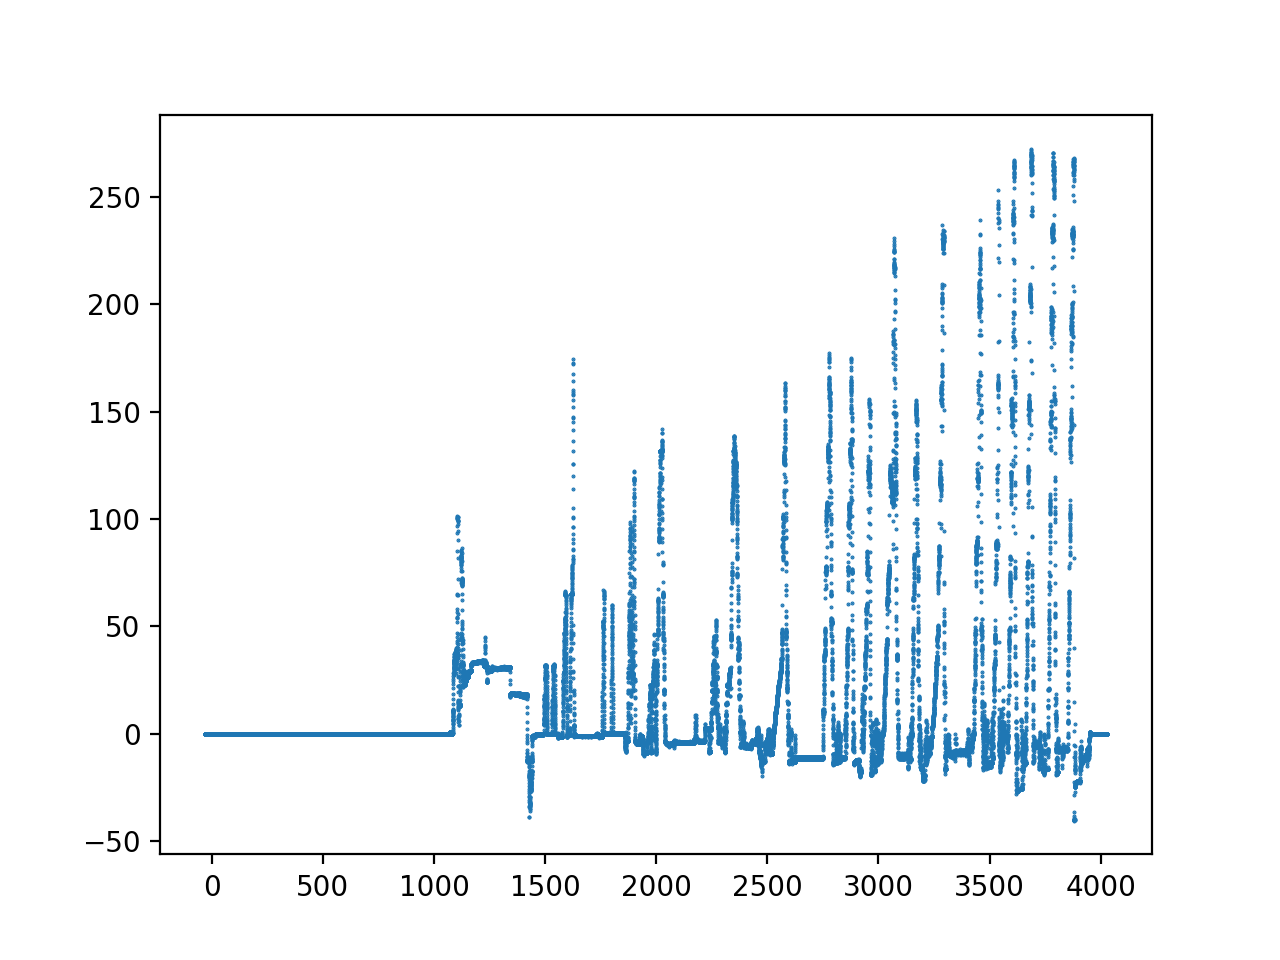

In [7]:
fig, ax = matplotlib.pyplot.subplots()

ax.scatter(complete_df['Time[s]'], complete_df['Power[hp]'], s=0.2)

matplotlib.pyplot.show()